# Анализ фейсбук страницы для MC-Pay

## **Описание проекта**

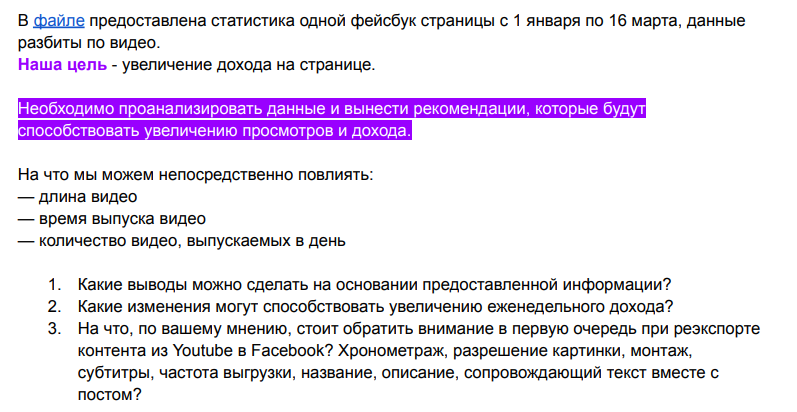

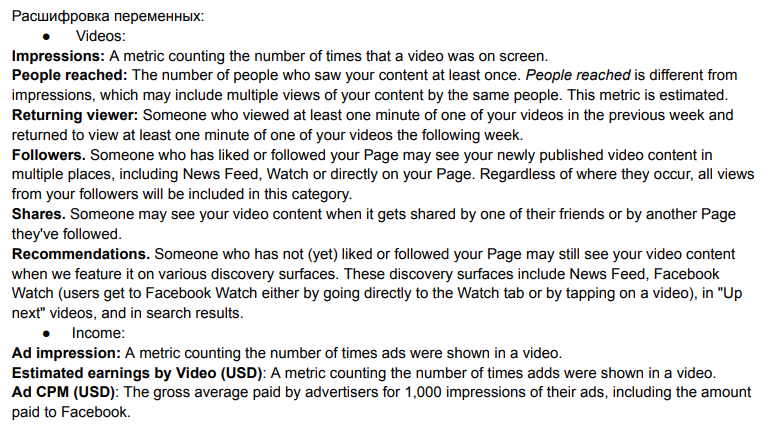

## **План проекта**


  1. Загрузка библиотек дял анализ и общий обзор таблицы 
  2. Исключение видео с ОЧЕНЬ высокими просмотрами для более корректного анализа
  3. Разделение видео на группы в зависимости от количества просмотров рекламы(Ad impression) в каждом ролике
  4. Анализ показателя Ad_impressions в зависимости от времени выкладывания ролика
  5. Анализ показателя Ad_impressions в зависимости от количества выкладываемых роликов в день
  6. Анализ показателя Ad_impressions в зависимости от длительности роликов
  7. Итоги. Рекомендации.

<div class="alert alert-info">Импорт библиотек и приведение таблицы к виду пригодному для анализа </div>

In [404]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('spreadsheet - Sheet1.csv')
data['Publish time'] = pd.to_datetime(data['Publish time'])
data['Video Duration (min)'] = data['Video Duration (secs)'] / 60
data['Publish date'] = pd.to_datetime(data['Publish time']).dt.date
data['Hour'] = data['Publish time'].dt.hour


df = data[['Title','Video Duration (secs)','Video Duration (min)','Publish date','Hour','Publish time','Ad CPM (USD)','Ad impressions', 'Estimated earnings by Video (USD)','Impressions','People reached','Returning viewers','Shares','Comments','Likes','Seconds viewed','Averaged Seconds viewed','60-second video views','Unique 60-second video views','3-second video views','Views by top audience (Female)','Views by top audience (Male)','Average Seconds viewed from Followers','Average Seconds viewed from Shares','Average Seconds viewed from Recommendations','Average Seconds viewed by returning viewers']]
df.columns = ['Title','Video_Duration_secs','Video_Duration_min','Publish_date','Hour','Publish_time','Ad_CPM_USD','Ad_impressions', 'Estimated_earnings_by_Video_USD','Impressions','People_reached','Returning_viewers','Shares','Comments','Likes','Seconds_viewed','Averaged_Seconds_viewed','60second_video_views','Unique_60-second_video_views','3second_video_views','Views_by_top_audience_Female','Views_by_top_audience_Male','Average_Seconds_viewed_from_Followers','Average_Seconds_viewed_from_Shares','Average_Seconds_viewed_from_Recommendations','Average_Seconds_viewed_by_returning_viewers']

print('Первые строки таблицы')
display(df.head(3))

Первые строки таблицы


,Title,Video_Duration_secs,Video_Duration_min,Publish_date,Hour,Publish_time,Ad_CPM_USD,Ad_impressions,Estimated_earnings_by_Video_USD,Impressions,People_reached,Returning_viewers,Shares,Comments,Likes,Seconds_viewed,Averaged_Seconds_viewed,60second_video_views,Unique_60-second_video_views,3second_video_views,Views_by_top_audience_Female,Views_by_top_audience_Male,Average_Seconds_viewed_from_Followers,Average_Seconds_viewed_from_Shares,Average_Seconds_viewed_from_Recommendations,Average_Seconds_viewed_by_returning_viewers
0,Mister Boom-Boom + MORE Kids Songs,545,9.083,2023-02-05,21,2023-02-05 21:02:00,4.020,1402,3.100,31092,25669,318.000,3,2,222,729090.160,34.900,2500,1948,9214,6442,2739,38.780,3.070,31.850,280.210
1,"Mommy, I Love you! + MORE Kids Songs",537,8.950,2023-02-06,14,2023-02-06 14:02:00,2.850,2615,4.100,49093,43918,878.000,7,10,358,1618853.380,43.620,8277,7453,18508,13188,5273,51.360,10.200,40.730,210.710
2,Fruits Shapes with Puppets + MORE Kids Songs,509,8.483,2023-02-06,17,2023-02-06 17:02:00,2.550,6195,8.700,106038,98034,1639.000,9,20,918,4222172.760,49.940,19997,19216,49163,34161,14897,51.900,3.120,49.590,196.180


**Что я сделала:**
- добавила для анализа столбец с часом выхода ролика для дальнейшего анализа по времени.
- добавила столбец Video_Duration_min для более простого визуального восприятия времени ролика в минутах
- оставила только те столбцы, которые могут пригодиться для анализа

<div class="alert alert-info">Общая информация о таблице</div>

In [405]:
print('Общая информация: ')
pd.set_option('display.max_columns', None)
df.info()

Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Title                                        212 non-null    object        
 1   Video_Duration_secs                          212 non-null    int64         
 2   Video_Duration_min                           212 non-null    float64       
 3   Publish_date                                 212 non-null    object        
 4   Hour                                         212 non-null    int64         
 5   Publish_time                                 212 non-null    datetime64[ns]
 6   Ad_CPM_USD                                   212 non-null    float64       
 7   Ad_impressions                               212 non-null    int64         
 8   Estimated_earnings_by_Video_USD              210 non-null    

**Выводы:**
- В таблице записи о выходе 212 роликов
- В столбцах есть единичные пропуски (максимум 2 записи), которые не повлияют на общий анализ.

<div class="alert alert-info">Исключение видео с ОЧЕНЬ высокими просмотрами для более корректного анализа</div>

In [406]:
print('Статистика просмотров видео')
display(df['Impressions'].describe())

Статистика просмотров видео


count       212.000
mean     154366.873
std      258401.002
min        2560.000
25%       27483.500
50%       40013.000
75%      145525.750
max     1817270.000
Name: Impressions, dtype: float64

**Выводы:**
- Некоторые видео могут "завируситься" и их статистика с высокими просмотрами(и следовательно в высокими просмотрами рекламы) не должна влиять на анализ, поэтому их следует исключить.
- В этой статистике мы видим, что среднее количество просмотров видео(mean) - 154 366, а медианное(50%) - 40 013. Это говорит о том, что есть ролики с ОЧЕНЬ высокими просмотрами, которые выбиваются из выборки.
- Максимальное количество просмотров - 1 817 270, а минимальное - 2 560.

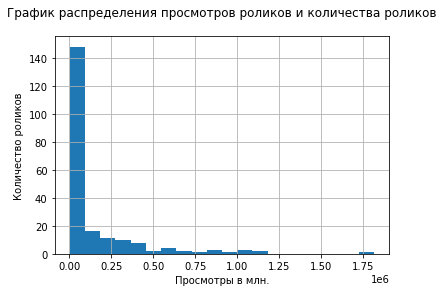

In [407]:
df.hist('Impressions', bins = 20)
plt.title('График распределения просмотров роликов и количества роликов', pad = 20)
plt.xlabel('Просмотры в млн.')
plt.ylabel('Количество роликов')
plt.show()

**Выводы:**
- На графике видим, что подавляющая чать роликов имеет до 500 000 просмотров.

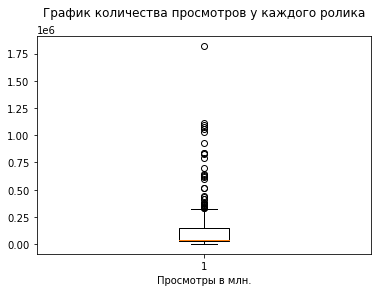

Только у 10% роликов количество просмотров выше - 417600
Только у 5% роликов количество просмотров выше - 742973
Только у 1% роликов количество просмотров выше - 1090600


In [408]:
plt.boxplot(df['Impressions'])
plt.title('График количества просмотров у каждого ролика', pad = 20)
plt.xlabel('Просмотры в млн.')
plt.show()
print(f'Только у 10% роликов количество просмотров выше - {round(np.percentile(df.Impressions, [90])[0])}')
print(f'Только у 5% роликов количество просмотров выше - {round(np.percentile(df.Impressions, [95])[0])}')
print(f'Только у 1% роликов количество просмотров выше - {round(np.percentile(df.Impressions, [99])[0])}')


**Выводы:**
- Исходя из графиков предлагаю убрать из анализа все видео с просмотрами выше 500 000. Мы потеряем около 7% записей, но анализ будет более корректным.

In [409]:
df_new = df.query('Impressions < 500000')
print(f' Было - {len(df)} записей')
print(f' Осталось - {len(df_new)} записей')

 Было - 212 записей
 Осталось - 193 записей


<div class="alert alert-info">Разделение видео на группы в зависимости от количества просмотров рекламы в каждом ролике</div>

In [410]:
print('Статистика просмотров рекламы в видео (Ad_impressions)')
display(df_new['Ad_impressions'].describe())

Статистика просмотров рекламы в видео (Ad_impressions)


count     193.000
mean     4967.518
std      6724.708
min         0.000
25%      1325.000
50%      1901.000
75%      4854.000
max     34807.000
Name: Ad_impressions, dtype: float64

**Выводы:**

- В этой статистике мы видим, что среднее количество просмотров рекламы в видео(mean) - 4 967, а медианное(50%) - 1 901.
- Максимальное количество просмотров - 34 807, а минимальное - 0.

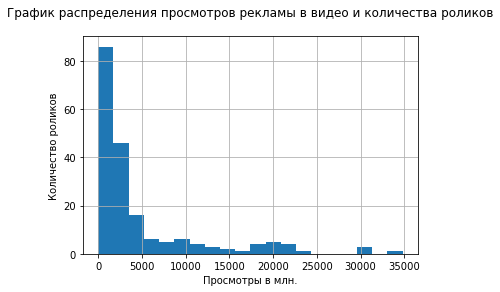

In [411]:
df_new.hist('Ad_impressions', bins = 20)
plt.title('График распределения просмотров рекламы в видео и количества роликов', pad = 20)
plt.xlabel('Просмотры в млн.')
plt.ylabel('Количество роликов')
plt.show()

**Выводы:**

- Видим, что просмотры рекламы в роликах распределяются неравномерно. Попытаемся найти отличия в роликах у которых ВЫСОКИЕ просмотры рекламы и у которых НИЗКИЕ.
- **Для этого каждому ролику дадим свой статус в зависимости от количества просмотров рекламы(Ad_impressions).** Всем роликам, у которых количество просмотров рекламы `выше, чем у 60% остальных роликов` - присвоим статус **'high_AD'**. А тем у у которых количество просмотров рекламы `ниже, чем у 40% остальных роликов` - присвоим статус **'low_AD'**

In [412]:
high_AD = np.percentile(df_new['Ad_impressions'], [60])
low_AD = np.percentile(df_new['Ad_impressions'], [40])

print(f'Видео у которых просмотры рекламы выше {round(high_AD[0])} - получают статус high_AD')
print(f'Видео у которых просмотры рекламы ниже {round(low_AD[0])} - получают статус low_AD')


Видео у которых просмотры рекламы выше 2512 - получают статус high_AD
Видео у которых просмотры рекламы ниже 1619 - получают статус low_AD


In [413]:
df_new.loc[(df['Ad_impressions'] >= high_AD[0]), 'status_ad_impressions'] = 'high_AD'
df_new.loc[(df['Ad_impressions'] <= low_AD[0]), 'status_ad_impressions'] = 'low_AD'

print('Количество записей в группах high_AD и low_AD')
df_new['status_ad_impressions'].value_counts()

Количество записей в группах high_AD и low_AD


low_AD     77
high_AD    77
Name: status_ad_impressions, dtype: int64

**Выводы:**

- У нас вышло по 77 записей в каждой группе. + записи у которых средние просмотры рекламы. Их пока не будем анализировать.

<div class="alert alert-info">Анализ показателя Ad_impressions в зависимости от времени выкладывания ролика</div>

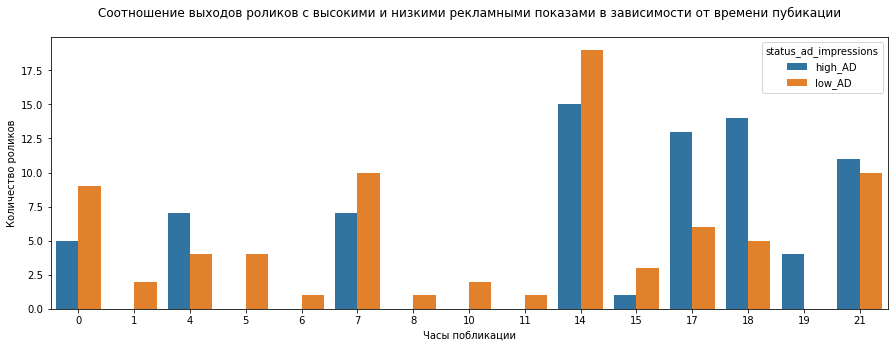

''

In [414]:
status_ad_impressions_hours = df_new.groupby(['status_ad_impressions', 'Hour']).agg({'Title':'count'}).reset_index().sort_values(by = 'Hour')
plt.figure(figsize=(15, 5)) 
sns.barplot(x = 'Hour', y='Title',  data=status_ad_impressions_hours, hue ='status_ad_impressions')
plt.title('Соотношение выходов роликов с высокими и низкими рекламными показами в зависимости от времени пубикации', pad = 20)
plt.xlabel('Часы побликации')
plt.ylabel('Количество роликов')
plt.show()
,

**Выводы:**

- На графике видим, что в 17,18,19 часов и 21 час количество роликов с высокими просмотрами рекламы **выше или намного выше**,чем с низкими. 
- Ролики выложенные с 1 ночи до 11 утра чаще всего с низкими просмотрами рекламы, за исключением 4 часов утра(но количество наблюдений, тоесть конкретных роликов, не так велико, что бы с уверенностью говорить, о том что это не случайность).

<div class="alert alert-info">Анализ показателя Ad_impressions в зависимости от количества выкладываемых роликов в день</div>

**Количество роликов выкладываемых в день**

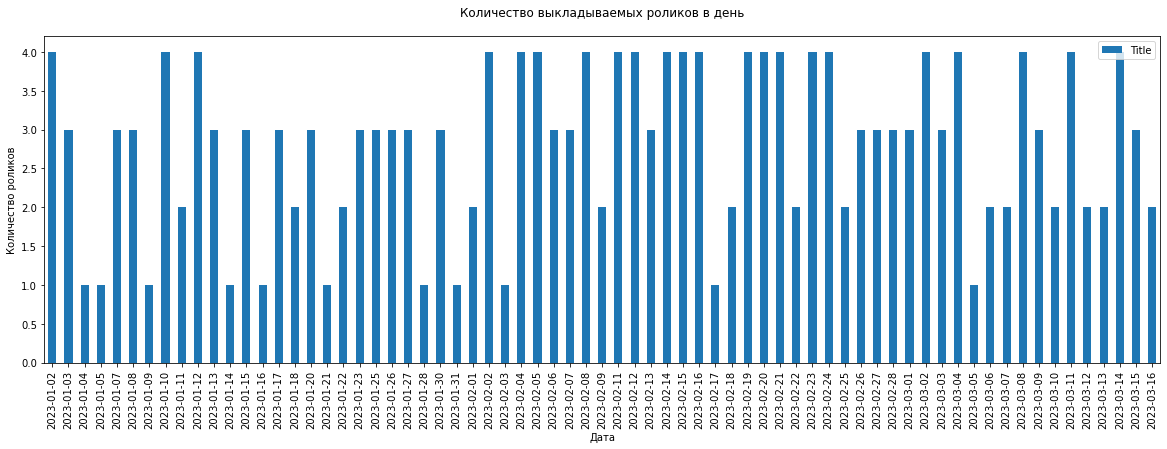

In [415]:
pivot = df_new.groupby('Publish_date')['Title'].count().reset_index()
pivot.plot(x='Publish_date', y='Title', kind='bar',figsize=(20,6))
plt.title('Количество выкладываемых роликов в день', pad = 20)
plt.xlabel('Дата')
plt.ylabel('Количество роликов')
plt.show()


In [416]:
print('Количество дней в которые выкладывались 1,2,3 или 4 ролика')
display(pivot.groupby('Title')['Publish_date'].count())

Количество дней в которые выкладывались 1,2,3 или 4 ролика


Title
1    11
2    14
3    22
4    22
Name: Publish_date, dtype: int64

**Выводы:**

- На графике видим, что чаще всего в день в аккаунте выкладывается 3 или 4 ролика, но есть дни когда выкладывали 1 или 2 ролика, а именно:
- 1 ролик выкладывали 11 дней
- 2 ролика выкладывали 14 дней
- 3 ролика выкладывали 22 дня
- 4 ролика выкладывали 22 дня

**График просмотров рекламы за каждый день**

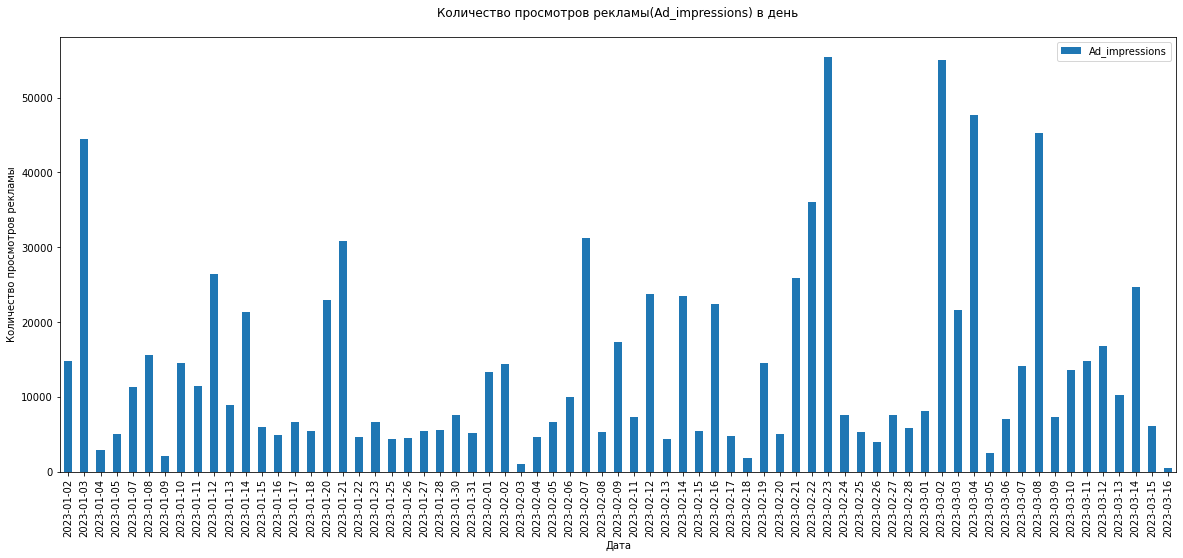

In [417]:
Ad_impressions_per_day = df_new.groupby('Publish_date')['Ad_impressions'].sum().reset_index()
Ad_impressions_per_day.plot(x='Publish_date', y='Ad_impressions',kind='bar',figsize=(20,8))
plt.title('Количество просмотров рекламы(Ad_impressions) в день', pad = 20)
plt.xlabel('Дата')
plt.ylabel('Количество просмотров рекламы')
plt.show()

**Выводы:**

- Визуально - никакой зависимости просмотров рекламы от количества выкладываемых роликов в день мы не видим, поэтому посчитаем корреляцию количества выпусков видео в день и количества просмотров рекламы.

**Корреляция количества выпусков видео в день и количества просмотров рекламы**

In [418]:
pivot = pivot.merge(df_new.groupby('Publish_date')['Ad_impressions'].sum().reset_index(), on='Publish_date',how='inner')
pivot.columns=['Publish_date','number_of_videos_per_day', 'Ad_impressions']
pivot.corr()

,number_of_videos_per_day,Ad_impressions
number_of_videos_per_day,1.000,0.352
Ad_impressions,0.352,1.000


**Выводы:**

- Показатель корреляции - 0,35, что говорит, о том что зависимость не очень большая, но есть. Чем больше роликов - тем больше просмотров и тем больше просмотров рекламы, что вполне логично.

**Посмотрим как распределяются количества выпусков видео в день и количества просмотров рекламы на графике:**

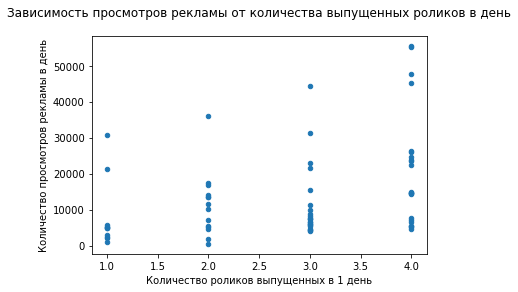

In [419]:
pivot.plot(x='number_of_videos_per_day', y='Ad_impressions', kind='scatter')
plt.title('Зависимость просмотров рекламы от количества выпущенных роликов в день', pad = 20)
plt.xlabel('Количество роликов выпущенных в 1 день')
plt.ylabel('Количество просмотров рекламы в день')
plt.show()

**Выводы:**

- На графике видим, что если в день выпускать 3 или 4 ролика, то шанс получить больше просмотром рекламы - выше.

**Средний и медианный показатель просмотров рекламы в зависимости от количества выложенных в день роликов**

In [420]:
pivot.groupby('number_of_videos_per_day').agg({'Ad_impressions' : ['median','mean']}).reset_index()

number_of_videos_per_day Ad_impressions          
                                   median      mean
0                        1       4854.000  7819.000
1                        2      10822.500 11253.714
2                        3       7377.000 11371.955
3                        4      14772.500 21135.773

**Тут я посчитала среднее и медианное количество просмотров рекламы за день:**
- если выпущен 1 ролик - среднее Ad_impressions 4 854, медианное - 7 819.
- если выпущено 2 ролика - среднее Ad_impressions 10 822, медианное - 11 253.
- если выпущено 3 ролика - среднее Ad_impressions 7 377, медианное - 11 371.
- если выпущено 4 ролика - среднее Ad_impressions 14 772, медианное - 21 135.

**Выводы:**
- Из тех данных, что мы имеем, можно сделать вывод, что оптимально выпускать 2 или 4 ролика, так как 3 ролика в день, по просмотрам рекламы практически не отличается от 2ух. 
- Естественно, следует помнить, что на просмотр роликов влияет много факторов кроме количества роликов в день -  в первую очерень таких как ТИП КОНТЕНТА, длительность, время выкладывания ролика.

<div class="alert alert-info">Анализ показателя Ad_impressions в зависимости от длительности роликов</div>

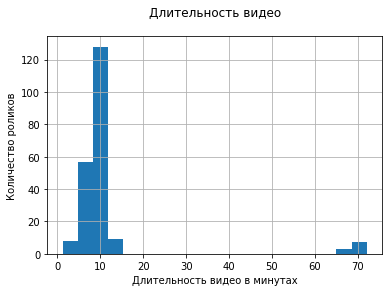

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Статистика показателя Video_Duration_min


count   193.000
mean     10.176
std       9.986
min       1.200
25%       8.217
50%       8.617
75%       9.033
max      72.117
Name: Video_Duration_min, dtype: float64

In [421]:
df.hist('Video_Duration_min', bins = 20)
plt.title('Длительность видео', pad = 20)
plt.ylabel('Количество роликов')
plt.xlabel('Длительность видео в минутах')
plt.show()
print(60* '= ')

print('Статистика показателя Video_Duration_min')
display(df_new['Video_Duration_min'].describe())


**Выводы:**

- На графике видим, что большая часть роликов - это видео около 10 минут.
- Так же есть небольшое количество видео длительностью около 70 минут.
- Минимальная длительность видео - 1,2 мин, максимальная - 72 мин, средняя 10 мин, медианная - 8,6 мин.

**Распределение показателя Ad_impressions в зависимости от длительности видео**

<AxesSubplot:xlabel='Video_Duration_min', ylabel='Ad_impressions'>

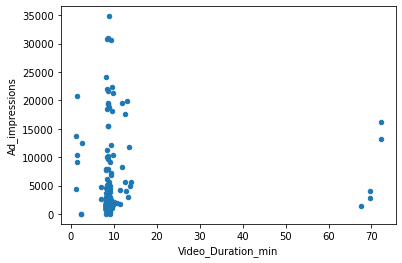

In [422]:
df_new[['Video_Duration_min','Ad_impressions']].plot(x='Video_Duration_min', y='Ad_impressions', kind='scatter')

**Вывод:**

- На графике видим, что количество просмотров рекламы распределяется практичестки независимо от длительности ролика. К тому же большинство записей, о роликах которые у нас есть примерно одинаковой длительность - 8-10 минут. Скорей всего, на Ad_impressions будет влиять % досматриваемости роликов и количество просмотренных секунд ролика. Но на этот показатель мы влиять не можем. Поэтому и анализировать его пока что не будем. На него может повлиять скорее тип контента и время выкладывания ролика.
- У единичных роликов до 5 минут и роликов выше 60 минут практичестки не отличается Ad_impressions. Что говорит о том, что нет смысла делать длинные ролики.

**Посмотрим как распределяется длительность роликов в зависимости от групп видео - high_AD и low_AD**

In [423]:
print('Длительность видео с высоким Ad impression')
display(df_high_AD['Video_Duration_min'].describe())
print('Длительность видео с низким Ad impression')
display(df_low_AD['Video_Duration_min'].describe())

Длительность видео с высоким Ad impression


count   77.000
mean    11.920
std     14.139
min      1.200
25%      8.317
50%      8.733
75%      9.317
max     72.117
Name: Video_Duration_min, dtype: float64

Длительность видео с низким Ad impression


count   77.000
mean     9.169
std      6.823
min      2.433
25%      8.167
50%      8.383
75%      8.967
max     67.517
Name: Video_Duration_min, dtype: float64

**Выводы:**

- В статистике групп с низким  и высоким Ad impression так же не видим значимой разницы в длительности видео.
- и в группе с низкими просмотрами рекламы и с высокими есть видео по 1-2 минуты и есть видео по 67-72 минуты. Медианная длительность видео и там и там около 8 минут. Средняя длительность видео чуть выше в группе с высоким Ad impression - 12 минут против 9 минут в группе с низким Ad impression, но данное различие в связи с небольшим количеством записей нельзя считать статистически значимым.

**Тоесть мы можем сказать, что длительность видео не влияет на показатель просмотров рекламы (в рамках тех данных что у нас есть)**


<div class="alert alert-info">Итоги. Рекомендации.</div>

В данном проекте я анализировала показатели на которые мы можем повлиять, тоесть - **количество видео в день, длительность видео и время в которое публикуется видео**. Показателем для ориентировки успешности видео - я выбрала **количество просматриваемой рекламы(Ad impression)**, так как он напрямую влияет на повышение нашего дохода.
____________________________________________________

- **Какие выводы можно сделать на основании предоставленной информации?**
1. В таблице записи о выходе 212 роликов. В столбцах есть единичные пропуски (максимум 2 записи), которые не повлияют на общий анализ.
2. Среднее количество просмотров видео - 154 366, а медианное - 40 013. Это говорит о том, что есть ролики с ОЧЕНЬ высокими просмотрами, которые выбиваются из выборки. Максимальное количество просмотров - 1 817 270, а минимальное - 2 560. Некоторые видео могут "завируситься" и их статистика с высокими просмотрами(и следовательно в высокими просмотрами рекламы) не должна влиять на анализ, поэтому их следует исключить.
3. Просмотры рекламы в роликах также распределяются неравномерно. Среднее количество просмотров рекламы в видео - 4 967, а медианное - 1 901. Максимальное количество просмотров - 34 807, а минимальное - 0. Попытаемся найти отличия в роликах у которых ВЫСОКИЕ просмотры рекламы и у которых НИЗКИЕ.
4. В 17,18,19 часов и 21 час количество роликов с высокими просмотрами рекламы **выше или намного выше**,чем с низкими. Ролики выложенные с 1 ночи до 11 утра чаще всего с низкими просмотрами рекламы, за исключением 4 часов утра(но количество наблюдений, тоесть конкретных роликов, не так велико, что бы с уверенностью говорить, о том что это не случайность).
5. Чаще всего в день в аккаунте выкладывается 3 или 4 ролика, но есть дни когда выкладывали 1 или 2 ролика, а именно:
- 1 ролик выкладывали 11 дней
- 2 ролика выкладывали 14 дней
- 3 ролика выкладывали 22 дня
- 4 ролика выкладывали 22 дня
6. Показатель зависимости количества роликов в день и просмотров рекламы в день - 0,35(корреляция), что говорит, о том что зависимость не очень большая, но есть. Чем больше роликов - тем больше просмотров и тем больше просмотров рекламы, что вполне логично.
7. Большая часть роликов - это видео около 10 минут. Так же есть небольшое количество видео длительностью около 70 минут. Минимальная длительность видео - 1,2 мин, максимальная - 72 мин, средняя 10 мин, медианная - 8,6 мин.
8. Количество просмотров рекламы(Ad impression) распределяется практичестки независимо от длительности ролика. К тому же большинство записей, о роликах, которые у нас есть примерно одинаковой длительность - 8-10 минут. Скорей всего, на Ad_impressions будет влиять % досматриваемости роликов и количество просмотренных секунд ролика. Но на эти показатели мы влиять не можем. Поэтому и анализировать его пока что не будем. На него может повлиять скорее тип контента и время выкладывания ролика. У единичных роликов до 5 минут и роликов выше 60 минут практичестки не отличается Ad_impressions. Что говорит о том, что нет смысла делать длинные ролики.
______________________________________________


- **Какие изменения могут способствовать увеличению еженедельного дохода?**
1. `Время выхода роликов.` В 17,18,19 часов и 21 час количество роликов с высокими просмотрами рекламы **выше или намного выше**, чем с низкими. Что говорит о том, что в целом в это время посещаемость и количество просмотренных секунд ВЫШЕ. А значит стоит обратить внимание на ежедневные выпуски роликов в это время.
2. `Количество выпускаемых роликов в день.` Из тех данных, что мы имеем, можно сделать вывод, что оптимально выпускать 2 или 4 ролика, так как 3 ролика в день, по просмотрам рекламы практически не отличается от 2ух. 2 можно выпускать тогда когда нет возможности выпустить 4 и чтобы не "перегружать" публику.
3. `Длительность роликов. ` Учитывая данные что у нас есть - видео по 67-70 минут не приносят больше просмотров рекламы, чем ролики по 10 минут. Поэтому есть смысл сосредоточится на роликах по 8-10 минут.

_________________________________________________

- **На что, по вашему мнению, стоит обратить внимание в первую очередь при реэкспортеконтента из Youtube в Facebook? Хронометраж, разрешение картинки, монтаж, субтитры, частота выгрузки, название, описание, сопровождающий текст вместе с постом?**
1. Хронометраж: Важно учитывать, что Facebook предпочитает видео короткой длительности, так как многие пользователи предпочитают быстро просматривать контент в ленте новостей. Поэтому, если видео слишком длинное, возможно, потребуется его обрезать или разбить на несколько частей.

2. Разрешение картинки и монтаж: Важно убедиться, что картинка яркая, четкая и привлекательная, а также что монтаж и визуальные эффекты хорошо работают на Facebook, где контент часто просматривают на мобильных устройствах.

3. Субтитры: Facebook предоставляет инструменты для добавления субтитров к видео, и это может быть полезным, для аудитории, которая предпочитает смотреть видео без звука. Также следует убедиться, что субтитры корректно отображаются и легко читаются на Facebook.

4. Частота выгрузки: Важно определить частоту выгрузки контента на Facebook и составить соответствующий план. Слишком частая выгрузка контента может стать раздражающей для аудитории, в то время как редкая выгрузка может привести к потере интереса аудитории.

5. Название, описание и сопровождающий текст: Важно создать привлекательное название и описание, которые будут захватывать внимание зрителей и заставлять их нажимать на видео. Также следует убедиться, что сопровождающий текст соответствует контенту и привлекает внимание аудитории.

6. В целом, при реэкспорте контента из Youtube в Facebook, необходимо убедиться, что контент соответствует требованиям и интересам аудитории на Facebook, а также что он корректно отображается и работает на этой платформе.